In [24]:
import os
import pandas as pd
import warnings
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns

from tqdm import tqdm
from random import randint
from tqdm.auto import tqdm
import time
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

import sys
#sys.path.append()
from KGB import preprocess_df, proceed_KGB


plt.rcParams["figure.figsize"] = (20, 16)
warnings.simplefilter("ignore")

In [2]:
current_dataset = 3
name_directory = "CTU-13-Dataset"
path = os.path.join(name_directory,str(current_dataset))
os.listdir(path)

['botnet-capture-20110812-rbot.pcap', 'capture20110812.binetflow', 'README']

In [3]:
datafile_name = [i for i in os.listdir(path) if i.endswith(".binetflow") ][0]
df = pd.read_csv(os.path.join(path,datafile_name))
df = preprocess_df(df)
df

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Backgroung_label,Normal_label,Botnet_label
40,2011-08-12 15:24:01.105063,75.532112,tcp,74.125.108.243,80,<?>,147.32.86.187,55707,FPA_FA,0.0,0.0,8107,10096400,10005608,flow=Background,True,False,False
41,2011-08-12 15:24:01.105402,6.650236,tcp,147.32.84.164,22,<?>,83.208.193.123,15173,FPA_FPA,0.0,0.0,33,3218,1532,flow=From-Normal-V44-Grill,False,True,False
42,2011-08-12 15:24:01.106568,3599.641602,tcp,217.168.211.184,3953,<?>,147.32.84.14,22,PA_PA,0.0,0.0,1604343,1585303458,38328160,flow=Background,True,False,False
43,2011-08-12 15:24:01.113763,1341.314453,udp,173.9.132.155,54369,<->,147.32.84.59,15046,CON,0.0,0.0,284072,243446592,120384296,flow=Background-Established-cmpgw-CVUT,True,False,False
44,2011-08-12 15:24:01.119062,3599.992920,tcp,88.103.40.117,37378,<?>,147.32.84.59,56306,PA_PA,0.0,0.0,229138,213637628,206786146,flow=Background-Established-cmpgw-CVUT,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4710633,2011-08-15 10:13:26.395097,0.002210,udp,147.32.85.2,55572,<->,147.32.80.9,53,CON,0.0,0.0,2,505,78,flow=To-Background-UDP-CVUT-DNS-Server,True,False,False
4710634,2011-08-15 10:13:26.408351,0.000312,udp,147.32.85.2,61416,<->,147.32.80.9,53,CON,0.0,0.0,2,369,78,flow=To-Background-UDP-CVUT-DNS-Server,True,False,False
4710635,2011-08-15 10:13:26.412151,0.006138,tcp,147.32.85.2,49590,->,195.113.232.98,80,SPA_SPA,0.0,0.0,9,5206,295,flow=Background-TCP-Established,True,False,False
4710636,2011-08-15 10:13:26.427955,0.000549,udp,89.176.63.143,27520,<->,147.32.84.229,13363,CON,0.0,0.0,2,131,71,flow=Background-UDP-Established,True,False,False


In [4]:
proceed_KGB(df, 2000 ) 

147.32.84.118    2295.319393
147.32.84.138    2121.861395
147.32.84.59     3309.609443
dtype: float64

In [5]:
df[df.SrcAddr=="147.32.84.165"] # c'est l'attaquant

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Backgroung_label,Normal_label,Botnet_label
61485,2011-08-12 15:53:17.142311,1966.745239,icmp,147.32.84.165,0x0303,->,81.166.246.198,0x8769,URP,0.0,NaN,3,285,285,flow=From-Botnet-V44-ICMP,False,False,True
178233,2011-08-12 16:56:52.873156,0.000456,udp,147.32.84.165,1026,<->,147.32.80.9,53,CON,0.0,0.0,2,400,74,flow=From-Botnet-V44-UDP-DNS,False,False,True
181705,2011-08-12 16:59:13.459181,0.121586,udp,147.32.84.165,1026,<->,147.32.80.9,53,CON,0.0,0.0,2,292,72,flow=From-Botnet-V44-UDP-DNS,False,False,True
181710,2011-08-12 16:59:13.581498,10.362481,tcp,147.32.84.165,1046,->,74.207.254.18,80,SPA_FSPA,0.0,0.0,9,1118,385,flow=From-Botnet-V44-TCP-WEB-Established,False,False,True
181716,2011-08-12 16:59:13.934712,0.101143,udp,147.32.84.165,1026,<->,147.32.80.9,53,CON,0.0,0.0,2,284,68,flow=From-Botnet-V44-UDP-DNS,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4520301,2011-08-15 09:25:26.819651,9.014144,tcp,147.32.84.165,2909,->,223.255.170.91,22,S_,0.0,NaN,3,186,186,flow=From-Botnet-V44-TCP-Attempt,False,False,True
4520369,2011-08-15 09:25:28.020389,9.013652,tcp,147.32.84.165,2910,->,223.255.178.83,22,S_,0.0,NaN,3,186,186,flow=From-Botnet-V44-TCP-Attempt,False,False,True
4532951,2011-08-15 09:29:18.079118,0.000000,udp,147.32.84.165,137,->,192.168.88.121,45366,INT,0.0,NaN,1,104,104,flow=From-Botnet-V44-UDP-Attempt,False,False,True
4576872,2011-08-15 09:42:00.883399,0.000000,udp,147.32.84.165,137,->,192.168.88.121,43886,INT,0.0,NaN,1,104,104,flow=From-Botnet-V44-UDP-Attempt,False,False,True


In [6]:
#"147.32.84.165"
end = pd.to_datetime("2011-08-15 09:25:29.020389")
cutted = df[df.StartTime<= end]
proceed_KGB(cutted, 1500 ) 

147.32.84.138    2452.262247
147.32.84.59     3505.735531
147.32.86.165    1534.883726
147.32.86.179    2201.423404
147.32.86.20     1754.553473
dtype: float64

In [8]:
window = 5
step = 30

window_delta = pd.Timedelta(window, "m")
min_time = df.StartTime.iloc[0]
max_time = df.StartTime.iloc[-1]
duration = max_time-min_time - window_delta
number_of_iterations = int(duration.total_seconds() / (step*60))


res = []
for i in tqdm(range(number_of_iterations)) :
    time_of_end = min_time + window_delta + pd.Timedelta(step*i, "m")
    cutted = df[df.StartTime<= time_of_end ]
    res.append(proceed_KGB(cutted, 0 ) )
res    
    


  0%|          | 0/133 [00:00<?, ?it/s]

[109.224.73.2      1.204947
 109.235.186.2     0.796631
 109.53.6.17       0.414746
 109.67.196.111    0.193387
 115.248.88.201    0.090621
                     ...   
 93.185.104.5      0.050155
 93.185.104.6      0.050155
 94.142.234.1      1.232405
 95.133.203.168    0.193387
 95.25.218.52      0.031207
 Length: 293, dtype: float64,
 109.255.85.46      0.417559
 113.105.171.56     0.067108
 114.159.147.131    0.137313
 115.248.88.201     0.242498
 117.227.44.134     0.151219
                      ...   
 91.193.32.245      0.137313
 91.55.218.118      0.417559
 93.51.112.113      0.151219
 94.129.144.224     2.467146
 94.19.81.162       0.149487
 Length: 194, dtype: float64,
 110.159.167.129    0.212949
 114.80.93.53       0.660153
 117.136.9.235      0.311480
 117.18.231.10      0.293799
 117.20.177.111     1.550591
                      ...   
 94.187.56.91       2.035932
 94.64.209.54       0.259224
 94.97.102.238      0.212949
 95.239.196.218     0.584235
 96.31.69.236       0.2

In [9]:
result = pd.concat(res)
result

<AxesSubplot:>

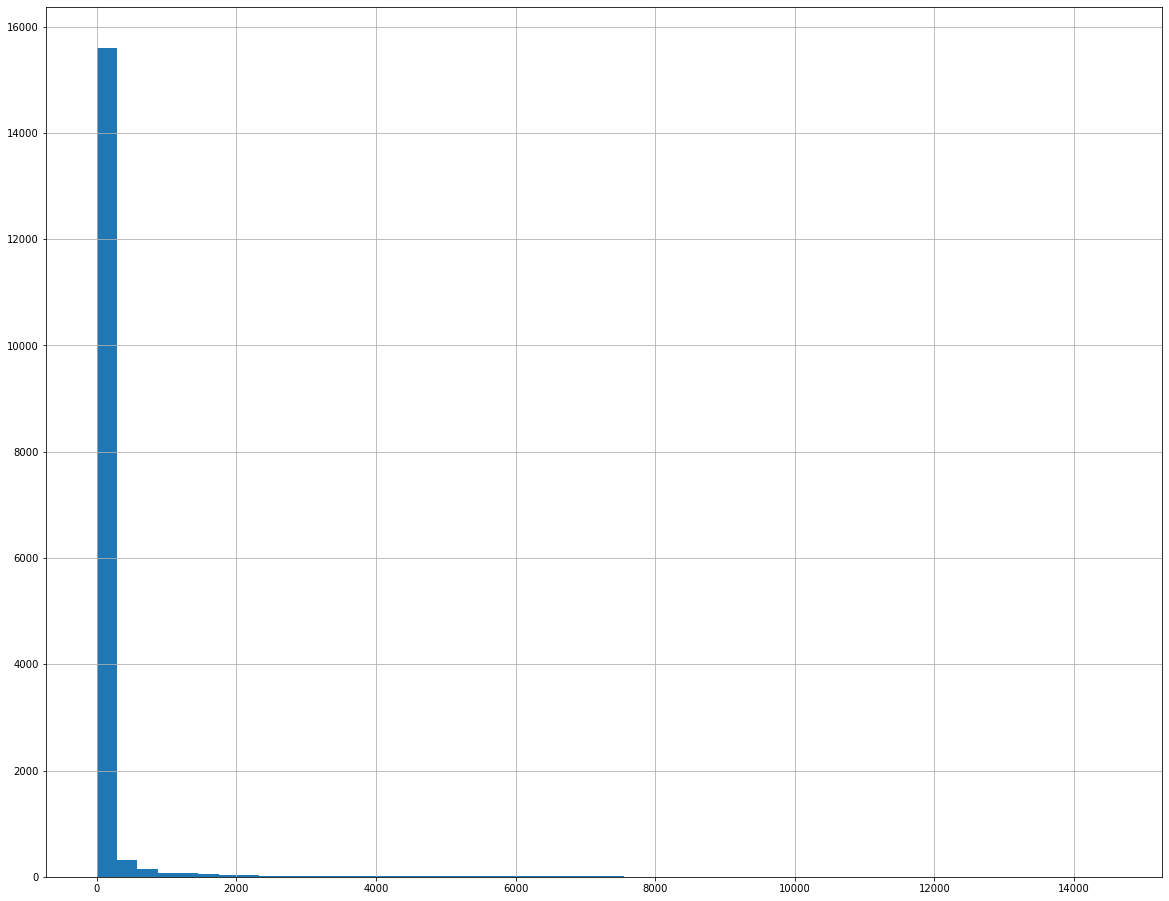

In [11]:
result.hist(bins = 50)

# Label

In [28]:
list_botnets = "147.32.84.165"
def label_data(serie, list_botnets) :
    labels = []
    for index, row in tqdm(serie.iteritems()) :
        labels.append(index in list_botnets)
    
    return pd.DataFrame({"IP_src" : serie.index, "anomaly_score" : serie.values, "label" : labels })
    
labelled_res =  label_data(result, list_botnets)
labelled_res.sort_values("anomaly_score", ascending=False)

0it [00:00, ?it/s]

,IP_src,anomaly_score,label
12233,147.32.84.138,14533.722958,False
12064,147.32.84.138,13676.743054,False
12269,147.32.86.20,12783.350704,False
11433,147.32.84.138,12471.164677,False
12094,147.32.86.20,12441.538654,False
...,...,...,...
3427,113.105.171.56,0.000010,False
3571,61.183.254.56,0.000010,False
3428,113.105.171.57,0.000006,False
3429,113.105.171.58,0.000006,False


In [33]:
values_weights = labelled_res.label.value_counts()
len_res = len(labelled_res)
labelled_res["weights"] = labelled_res["label"].apply(lambda x : len_res/values_weights.loc[x] )
labelled_res.sort_values("weights", ascending=False)

,IP_src,anomaly_score,label,weights
13224,147.32.84.165,5533.446619,True,533.00000
13973,147.32.84.165,5085.736074,True,533.00000
7244,147.32.84.165,155.048758,True,533.00000
14115,147.32.84.165,4798.699163,True,533.00000
15720,147.32.84.165,2430.015391,True,533.00000
...,...,...,...,...
5511,147.32.84.227,0.800728,False,1.00188
5512,147.32.84.229,0.882720,False,1.00188
5513,147.32.84.242,0.301800,False,1.00188
5514,147.32.84.25,1.495112,False,1.00188


False    16492
True        31
Name: label, dtype: int64

# Logistic Regression

In [52]:
X = labelled_res.anomaly_score.values.reshape(-1, 1)
Y = labelled_res.label
weights = labelled_res.weights.values

clf = LogisticRegression(random_state=4242)
clf.fit(X, Y, sample_weight = weights)
clf.coef_, clf.intercept_

(array([[0.00133094]]), array([-1.36746437]))

In [ ]:
def compute_losses(data,threshold) :
    
    alpha = 0.01
    
    np.exp(-alpha * window)
    correcting function ¼ eða * N+ comparison time frameÞ þ 1
    
    TP
    
    
    

In [ ]:
# Gradient Descent

In [ ]:
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)